 **2.3.1. Загрузка данных и первичный осмотр**


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import pandas as pd                  # Импорт библиотеки pandas для работы с табличными данными (DataFrame)
import numpy as np                   # Импорт библиотеки numpy для работы с массивами и числовыми операциями
import seaborn as sns                # Импорт библиотеки seaborn для создания красивых и информативных визуализаций данных
from matplotlib import pyplot as plt # Импорт функции pyplot из библиотеки matplotlib для создания графиков и визуализаций

In [9]:
dataset = pd.read_csv('/content/drive/MyDrive/ИИ/S02-hw-dataset.csv')
dataset.head()#выведем первые 5 строк таблицы

,user_id,age,country,purchases,revenue
0,1,25.0,FR,7,749
1,2,24.0,RU,5,1115
2,3,52.0,FR,7,399
3,4,31.0,RU,6,654
4,5,NaN,DE,6,1296


In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   user_id    41 non-null     int64  
 1   age        39 non-null     float64
 2   country    41 non-null     object 
 3   purchases  41 non-null     int64  
 4   revenue    41 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 1.7+ KB


In [16]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
user_id,41.0,20.243902,11.659289,1.0,10.0,20.0,30.0,40.0
age,39.0,36.512821,18.304259,5.0,24.0,33.0,45.5,120.0
purchases,41.0,4.829268,2.710189,-1.0,3.0,5.0,7.0,11.0
revenue,41.0,820.048780,613.127269,0.0,432.0,693.0,1115.0,2475.0


**2.3.2. Пропуски, дубликаты и базовый контроль качества**

In [17]:
dataset.isna().mean()

,0
user_id,0.00000
age,0.04878
country,0.00000
purchases,0.00000
revenue,0.00000


In [18]:
dupl_columns = list(dataset.columns)
mask = dataset.duplicated(subset=dupl_columns)
dataset_duplicates = dataset[mask]
print(f'Число найденных дубликатов: {dataset_duplicates.shape[0]}')

Число найденных дубликатов: 1


In [22]:
# 1. Отрицательные значения в purchases
print("1. Отрицательные значения в поле purchases:")
neg_purchases = dataset[dataset['purchases'] < 0]
if not neg_purchases.empty:
    print(neg_purchases[['user_id', 'purchases', 'revenue']])
else:
    print("Нет отрицательных значений")
print()

# 2. Нереалистичный возраст (<1 или >100)
print("2. Нереалистичный возраст (<1 или >100):")
unreal_age = dataset[ (dataset['age'] > 100)]
if not unreal_age.empty:
    print(unreal_age[['user_id', 'age', 'country']])
else:
    print("Нет нереалистичных возрастов")
print()
# 3. Нулевой доход при ненулевых покупках
print("3. Нулевой доход при ненулевых покупках:")
zero_revenue = dataset[(dataset['revenue'] == 0) & (dataset['purchases'] > 0)]
if not zero_revenue.empty:
    print(zero_revenue[['user_id', 'purchases', 'revenue', 'country']])
else:
    print("Нет таких случаев")
print()
# 4. Нулевые покупки при ненулевом доходе
print("4. Нулевые покупки при ненулевом доходе:")
zero_purchases = dataset[(dataset['purchases'] == 0) & (dataset['revenue'] > 0)]
if not zero_purchases.empty:
    print(zero_purchases[['user_id', 'purchases', 'revenue', 'country']])
else:
    print("Нет таких случаев")
print()
# 5. Пропуски в возрасте
print("6. Пропуски в возрасте:")
missing_age = dataset[dataset['age'].isna()]
if not missing_age.empty:
    print(missing_age[['user_id', 'age', 'country', 'purchases']])
else:
    print("Нет пропусков")


1. Отрицательные значения в поле purchases:
   user_id  purchases  revenue
5        6         -1      785

2. Нереалистичный возраст (<1 или >100):
   user_id    age country
5        6  120.0      FR

3. Нулевой доход при ненулевых покупках:
    user_id  purchases  revenue country
10       11          4        0      US

4. Нулевые покупки при ненулевом доходе:
Нет таких случаев

6. Пропуски в возрасте:
    user_id  age country  purchases
4         5  NaN      DE          6
12       13  NaN      US          9


  В данных обнаружены три основные категории проблем качества. Во-первых,
некорректные числовые значения: возраст пользователя 6 составляет 120 лет (нереалистичное значение), а у пользователя 6 же количество покупок равно -1, что невозможно в реальности. Во-вторых, логические несоответствия: у пользователя 11 зафиксировано 4 покупки, но доход от них равен нулю, что противоречит смыслу данных. Кроме того, в данных присутствуют пропущенные значения: у пользователей 5 и 13 не указан возраст (поле age содержит NaN).Это требует очистки

**2.3.3. Базовый EDA: группировки, агрегаты и частоты**

In [29]:
print("Распределение по странам:")
dataset['country'].value_counts()


Распределение по странам:


,count
country,
RU,13
FR,12
US,8
DE,6
CN,2


In [34]:
dataset.groupby('country')['revenue'].agg(['mean', 'sum', 'count'])


,mean,sum,count
country,,,
CN,1054.000000,2108,2
DE,1445.500000,8673,6
FR,675.916667,8111,12
RU,790.076923,10271,13
US,557.375000,4459,8


По количеству пользователей - Россия (13 пользователей) и Франция (12 пользователей), вместе составляя более 60% от всей выборки. При этом по финансовым показателям наблюдается: Германия демонстрирует наибольшую среднюю выручку на пользователя (1445.5), значительно опережая другие страны, хотя имеет всего 6 пользователей. Россия, несмотря на наибольшее количество пользователей, показывает среднюю выручку 790.1, занимая второе место по этому показателю.

Cущественный разрыв в средней выручке между Германием и другими странами: немецкие пользователи приносят в 2-2.5 раза больше дохода, чем пользователи из США (557.4) и Франции (675.9). Также интересно, что Китай с всего двумя пользователями показывает высокую среднюю выручку (1054), занимая второе место по этому показателю, что может указывать на высокую покупательную способность этой небольшой группы.


 **2.4. Визуализация данных в Matplotlib**

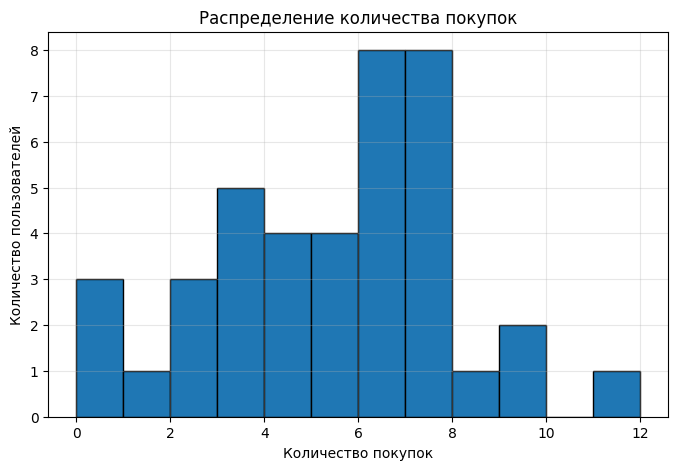

In [39]:
plt.figure(figsize=(8, 5))
plt.hist(dataset['purchases'], bins=range(0, 13), edgecolor='black')
plt.title('Распределение количества покупок')
plt.xlabel('Количество покупок')
plt.ylabel('Количество пользователей')
plt.grid(True, alpha=0.3)
plt.show()

**Вывод**

Распределение пользователей по странам неравномерное: Россия и Франция составляют большинство, что указывает на региональную специфику бизнеса. Германия и Китай представлены минимально.

Финансовая эффективность различается: Немецкие пользователи демонстрируют самую высокую среднюю выручку (1445.5), почти в 3 раза превышая показатели США (557.4). Это может указывать на более высокую покупательную способность или эффективность монетизации в Германии.

Качество данных требует очистки: Обнаружены критические ошибки:

Нереалистичный возраст (120 лет)

Отрицательное количество покупок (-1)

Логическое противоречие (покупки есть, а выручки нет)

Пропущенные значения возраста

Активность покупок: Распределение количества покупок близко к нормальному с медианой около 5-6 покупок на пользователя. Наблюдается положительная корреляция между количеством покупок и выручкой, но с существенным разбросом.

<Figure size 1000x600 with 0 Axes>

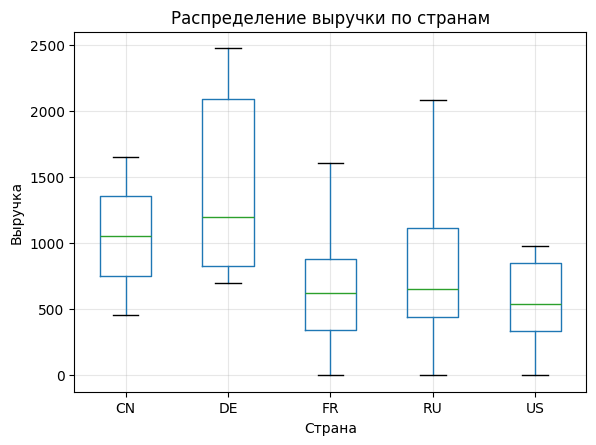

In [46]:
plt.figure(figsize=(10, 6))
dataset.boxplot(column='revenue', by='country',  grid=False)
plt.title('Распределение выручки по странам')
plt.xlabel('Страна')
plt.ylabel('Выручка')
plt.suptitle('')  # Убираем автоматический заголовок
plt.grid(True, alpha=0.3)
plt.show()

**Вывод**

Германия (DE) показывает наиболее высокую и стабильную выручку — медиана и межквартильный разряд расположены выше всех, минимальных выбросов нет. Это указывает на высокую и устойчивую покупательную способность немецких пользователей.

Россия (RU) имеет самый широкий разброс значений — присутствуют как низкие (близкие к нулю), так и высокие выбросы. Это говорит о неоднородной аудитории: есть как малоактивные, так и высокоплатежеспособные пользователи.

США (US) и Франция (FR) демонстрируют схожие показатели с умеренной медианой, но у Франции есть несколько высоких выбросов, что может указывать на наличие VIP-клиентов.

Китай (CN) представлен всего двумя пользователями, что статистически недостаточно для значимых выводов, но оба показывают высокую выручку без выбросов.


График сохранён на Google Диск: /content/drive/MyDrive/ИИ/revenue_purchases.png


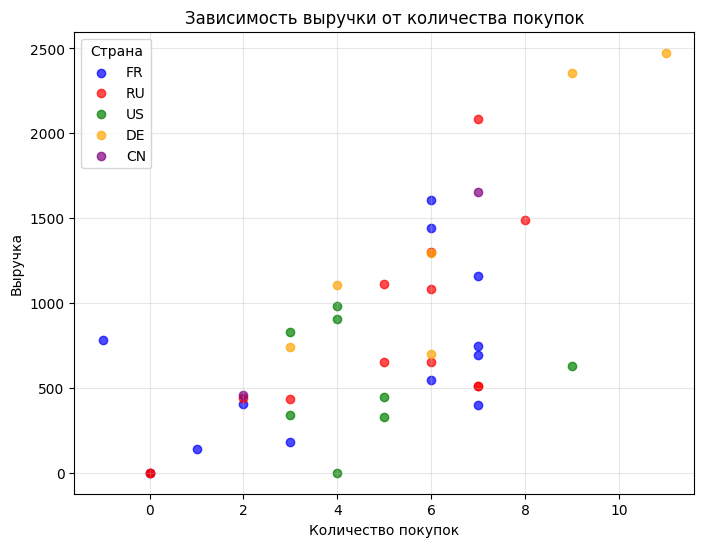

In [52]:
import os
plt.figure(figsize=(8, 6))

# Разные цвета по странам
colors = {'FR': 'blue', 'RU': 'red', 'US': 'green', 'DE': 'orange', 'CN': 'purple'}
for country, color in colors.items():
    country_data = dataset[dataset['country'] == country]
    plt.scatter(country_data['purchases'], country_data['revenue'],
                color=color, label=country, alpha=0.7)

plt.title('Зависимость выручки от количества покупок')
plt.xlabel('Количество покупок')
plt.ylabel('Выручка')
plt.grid(True, alpha=0.3)
plt.legend(title='Страна')

save_dir = '/content/drive/MyDrive/ИИ/'
os.makedirs(save_dir, exist_ok=True)

# Полный путь для сохранения
save_path = os.path.join(save_dir, 'revenue_purchases.png')
plt.savefig(save_path, dpi=300, bbox_inches='tight')
print(f"График сохранён на Google Диск: {save_path}")

plt.show()

**Вывод**

Общая положительная зависимость наблюдается — с ростом количества покупок обычно растёт и выручка, что логично и ожидаемо. Однако зависимость нелинейная и имеет значительный разброс.

Немецкие (DE, оранжевые) и китайские (CN, фиолетовые) пользователи выделяются на фоне остальных — при одинаковом количестве покупок они часто приносят значительно больше выручки, особенно заметно в диапазоне 5-7 покупок.

Российские пользователи (RU, красные) демонстрируют наибольший разброс: есть как клиенты с высокой эффективностью (много выручки при среднем числе покупок), так и случаи с низкой отдачей.

Французские (FR, синие) и американские (US, зелёные) пользователи показывают более предсказуемую и сгруппированную зависимость, без резких выбросов.